# Clustering with OPTICS (Ordering Points To Identify the Clustering Structure)

In [2]:
from sklearn.cluster import DBSCAN
from matplotlib.image import imread
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
from sklearn import metrics


import os
from nibabel.testing import data_path
import nibabel as nib

from sklearn.cluster import OPTICS, cluster_optics_dbscan

import time

import scipy.io

In [3]:
image = imread('Rsomamapmodel.png') 

#convert it into two dimensional
#Flatten the image to create a 2D array of pixels
print(image.shape)
X = image.reshape(-1,4)

print(X.shape)

(359, 407, 4)
(146113, 4)


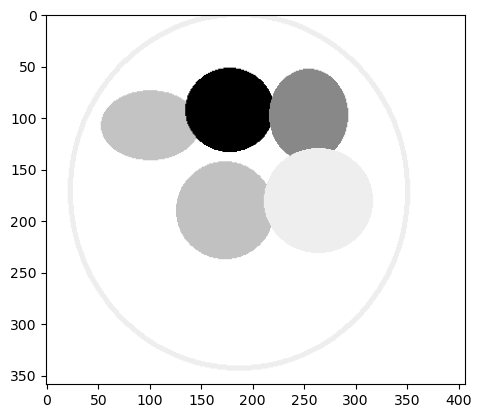

In [7]:
plt.imshow(image)

In [8]:
#loop over different parameters values

#maximum distance between two samples 
#for one to be considered as in the neighborhood of the other.

min_samples_list=np.arange(40,90,10)
labels_list=[]
tot_t_list=[]
max_eps=0.001

for s in min_samples_list:
    
    print(s)
    
    t0=time.time()
    clust = OPTICS(max_eps=max_eps,min_samples=s)
    
    # Run the fit
    labels=clust.fit_predict(X)
    
    labels_list.append(labels)
    
    t1=time.time()
    
    tot_t_list.append(t1-t0)
    
    t_tot = (t1-t0)/60
    
    print("Total clustering time %0.3f min" %t_tot)

40
Total clustering time 5.175 min
50
Total clustering time 5.170 min
60
Total clustering time 5.059 min
70
Total clustering time 4.991 min
80
Total clustering time 5.159 min


[0 1 2 3 4 5]


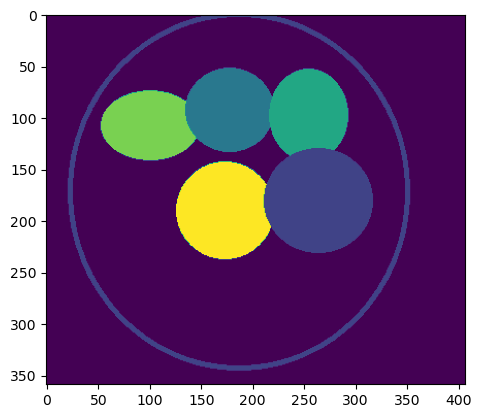

In [11]:
segmented_img = labels_list[0].reshape(image.shape[:2])#image.shape[:2]
plt.imshow(segmented_img)

labels=np.unique(labels_list[0])
print(labels)#it represents the number of clusters detected

We find the same segmentation results for the others values of min_samples.

In [12]:
SS_scores_list=[]

for labels in labels_list:
    
    SS_score=silhouette_score(X, labels)
    SS_scores_list.append(SS_score)

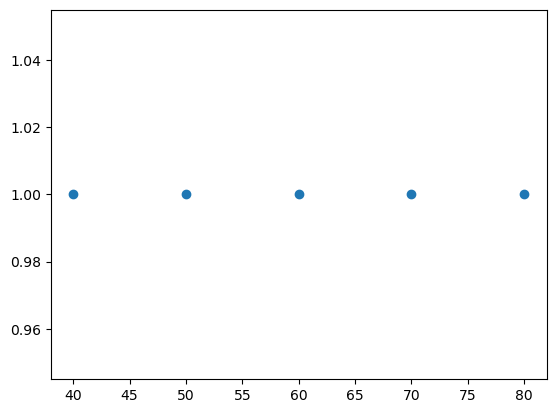

In [13]:
plt.scatter(min_samples_list,SS_scores_list)

Text(0.5, 1.0, 'max_eps=0.001000')

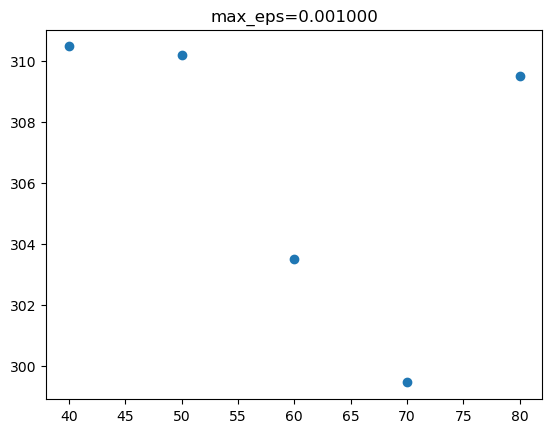

In [14]:
#Plot total time required vs min_samples
plt.scatter(min_samples_list,tot_t_list)
plt.title("max_eps=%f"%max_eps)

The total clustering time required generally decreases with increasing the number of samples chosen. For the last clustering computation we see an exception, maybe due to the stochastic nature of the algorithm.

Now repeat the same clustering procedure for one axial slice of MNI152 brain image.

In [9]:
image = imread('T1MNI.jpg') 

#convert it into two dimensional
#Flatten the image to create a 2D array of pixels
print(image.shape)

X = image.reshape(-1,3)

print(X.shape)

(420, 560, 3)
(235200, 3)


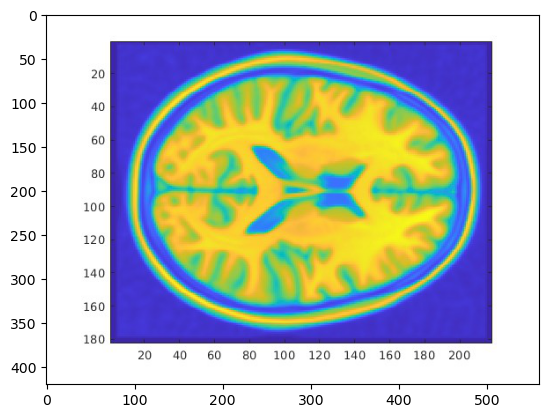

In [10]:
plt.imshow(image)

In [11]:
#loop over different parameters values

#maximum distance between two samples 
#for one to be considered as in the neighborhood of the other.

min_samples_list=np.arange(40,90,10)
labels_list=[]
tot_t_list=[]
max_eps=0.001

for s in min_samples_list:
    
    print(s)
    
    t0=time.time()
    clust = OPTICS(max_eps=max_eps,min_samples=s)
    
    # Run the fit
    labels=clust.fit_predict(X)
    
    labels_list.append(labels)
    
    t1=time.time()
    
    tot_t_list.append(t1-t0)
    
    t_tot = (t1-t0)/60
    
    print("Total clustering time %0.3f min" %t_tot)

40
Total clustering time 5.854 min
50
Total clustering time 5.430 min
60
Total clustering time 5.368 min
70
Total clustering time 5.430 min
80
Total clustering time 5.437 min


[ -1   0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16
  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34
  35  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52
  53  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70
  71  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88
  89  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106
 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124
 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142
 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160
 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178
 179 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196
 197 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214
 215 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232
 233 234 235 236 237 238 239 240 241 242 243 244 24

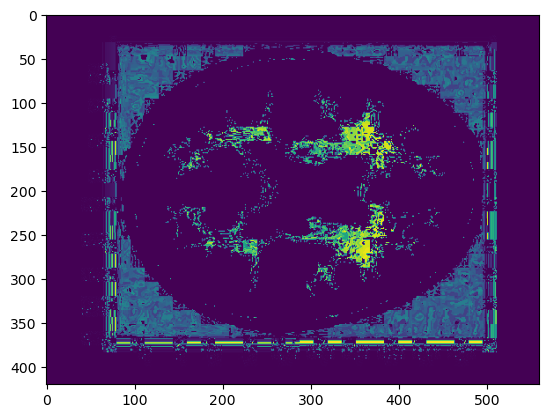

In [12]:
segmented_img = labels_list[0].reshape(image.shape[:2])#image.shape[:2]
plt.imshow(segmented_img)

labels=np.unique(labels_list[0])
print(labels)

[ -1   0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16
  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34
  35  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52
  53  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70
  71  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88
  89  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106
 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124
 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142
 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160
 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178
 179 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196
 197 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214
 215 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232
 233 234 235 236 237 238 239 240 241 242 243 244 24

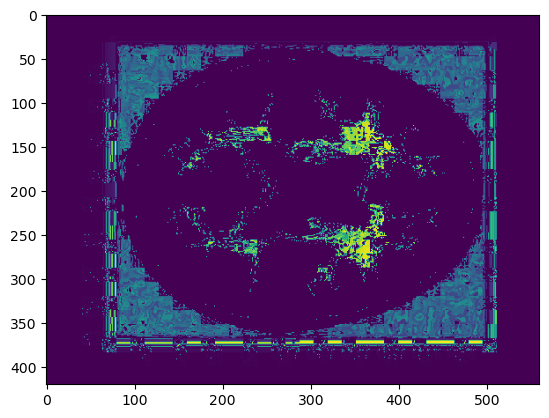

In [13]:
segmented_img = labels_list[1].reshape(image.shape[:2])#image.shape[:2]
plt.imshow(segmented_img)

labels=np.unique(labels_list[1])
print(labels)

[ -1   0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16
  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34
  35  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52
  53  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70
  71  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88
  89  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106
 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124
 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142
 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160
 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178
 179 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196
 197 198 199]


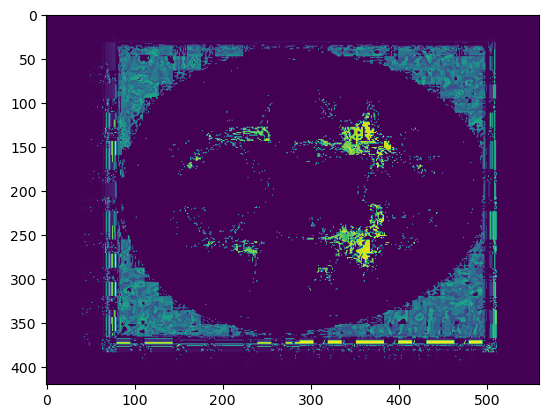

In [14]:
segmented_img = labels_list[2].reshape(image.shape[:2])#image.shape[:2]
plt.imshow(segmented_img)

labels=np.unique(labels_list[2])
print(labels)

[ -1   0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16
  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34
  35  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52
  53  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70
  71  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88
  89  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106
 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124
 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142
 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160
 161 162 163 164 165 166 167 168 169 170]


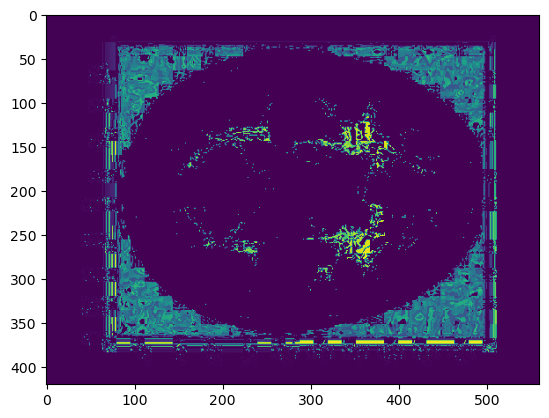

In [15]:
segmented_img = labels_list[3].reshape(image.shape[:2])#image.shape[:2]
plt.imshow(segmented_img)

labels=np.unique(labels_list[3])
print(labels)

[ -1   0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16
  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34
  35  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52
  53  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70
  71  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88
  89  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106
 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124
 125 126 127 128 129 130 131 132 133 134 135 136 137 138]


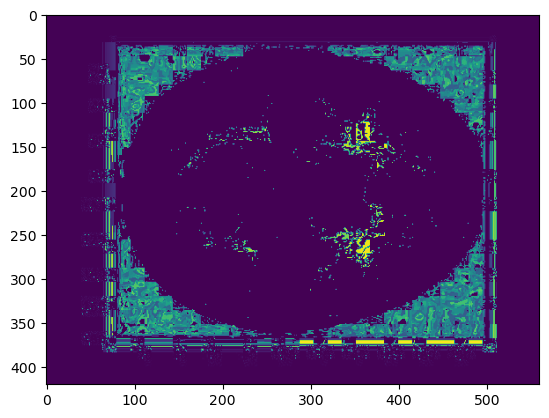

In [16]:
segmented_img = labels_list[4].reshape(image.shape[:2])#image.shape[:2]
plt.imshow(segmented_img)

labels=np.unique(labels_list[4])
print(labels)

We can notice that increasing the number of samples in a neighborhood for a point to be considered as a core point, decreases the capability to detect white matter structure (in fact as we can see below, the silhouette score decreases with increasing min_samples parameter). Many clusters maybe are identified outside the brain. Let us verify using an other one without background.

In [17]:
SS_scores_list=[]

for labels in labels_list:
    
    SS_score=silhouette_score(X, labels)
    SS_scores_list.append(SS_score)

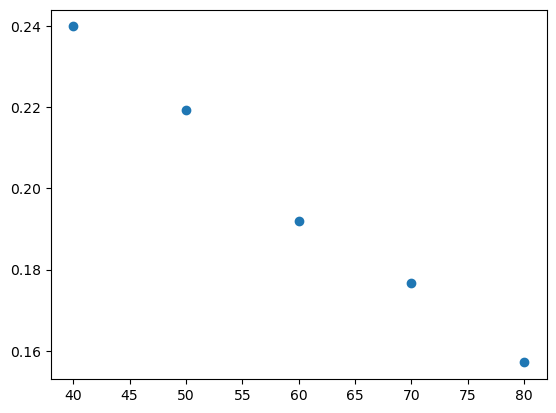

In [18]:
plt.scatter(min_samples_list,SS_scores_list)

Text(0.5, 1.0, 'max_eps=0.001000')

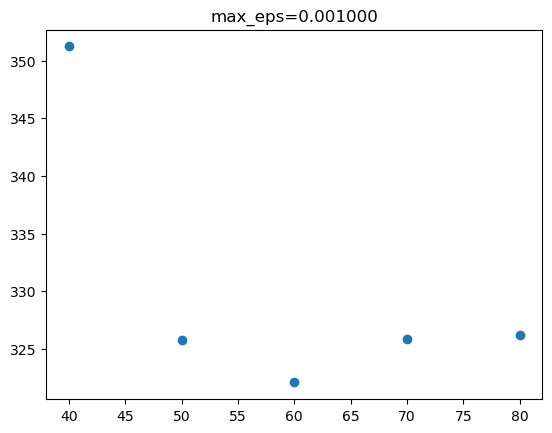

In [19]:
#Plot total time required vs min_samples
plt.scatter(min_samples_list,tot_t_list)
plt.title("max_eps=%f"%max_eps)

In [44]:
image = imread('T1_bet.jpg') 

#convert it into two dimensional
#Flatten the image to create a 2D array of pixels
print(image.shape)

X = image.reshape(-1,3)

print(X.shape)

(420, 560, 3)
(235200, 3)


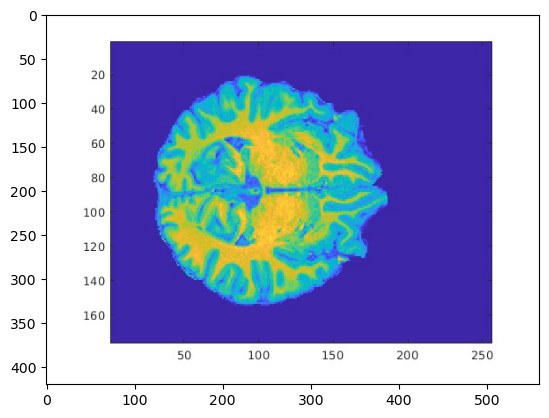

In [45]:
plt.imshow(image)

In [46]:
#loop over different parameters values

#maximum distance between two samples 
#for one to be considered as in the neighborhood of the other.

min_samples_list=np.arange(40,90,10)
labels_list=[]
tot_t_list=[]
max_eps=0.001

for s in min_samples_list:
    
    print(s)
    
    t0=time.time()
    clust = OPTICS(max_eps=max_eps,min_samples=s)
    
    # Run the fit
    labels=clust.fit_predict(X)
    
    labels_list.append(labels)
    
    t1=time.time()
    
    tot_t_list.append(t1-t0)
    
    t_tot = (t1-t0)/60
    
    print("Total clustering time %0.3f min" %t_tot)

40
Total clustering time 5.971 min
50
Total clustering time 6.008 min
60
Total clustering time 5.998 min
70
Total clustering time 6.016 min
80
Total clustering time 6.007 min


[-1  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22
 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46
 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70
 71 72 73 74 75 76 77 78 79 80 81]


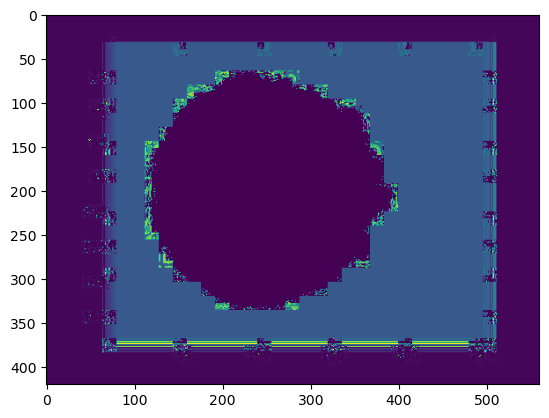

In [47]:
segmented_img = labels_list[0].reshape(image.shape[:2])#image.shape[:2]
plt.imshow(segmented_img)

labels=np.unique(labels_list[0])
print(labels)

In [48]:
SS_scores_list=[]

for labels in labels_list:
    
    SS_score=silhouette_score(X, labels)
    SS_scores_list.append(SS_score)

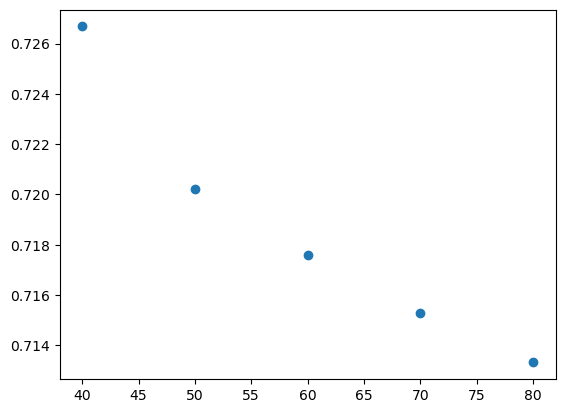

In [49]:
plt.scatter(min_samples_list,SS_scores_list)

Text(0.5, 1.0, 'max_eps=0.001000')

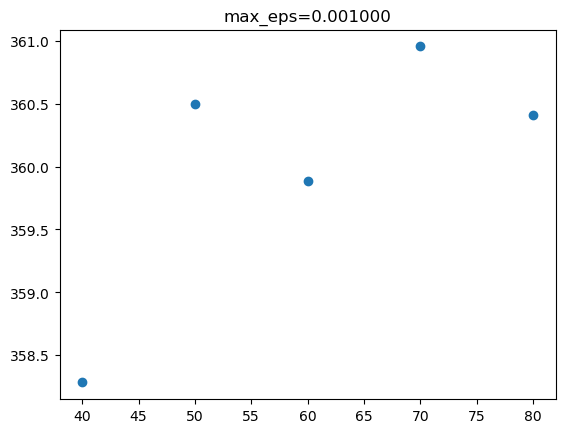

In [50]:
#Plot total time required vs min_samples
plt.scatter(min_samples_list,tot_t_list)
plt.title("max_eps=%f"%max_eps)

Since clustering performance decreases increasing min_samples, let us check what happens decreasing values of min_samples.

If we save the image directly from Matlab to cluster, the algorithm searches for patterns even in the background. Let us save numerical matrix of the image and apply clustering algorithm directly on that (we could also try on a screenshot).

## Conclusions

We need to understand which are the optimal paramters to set both for computational time and for better clustering results.

## References

1. https://scikit-learn.org/stable/modules/generated/sklearn.cluster.OPTICS.html
2. https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html